In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [5]:
directory = "results/"
paths = os.listdir(directory)

def get_rewards(env, adv, section, run=''):
    w_rewards = []
    a_rewards = []
    for path in paths:
        if not (env in path and adv in path and section in path):
            continue
        with open(directory+path, 'rb') as fp:
            r = pickle.load(fp)
        if 'avg_' in path:
            a_rewards.append(r)
        else:
            w_rewards.append(r)
    
    a_rewards = np.array(a_rewards)
    # print(a_rewards)
    a_mean = np.mean(a_rewards, axis=0)
    a_std = np.std(a_rewards, axis=0)
    
    w_rewards = np.array(w_rewards)
    w_mean = np.mean(w_rewards, axis=0)
    w_std = np.std(w_rewards, axis=0)
    
    return (a_mean, a_std), (w_mean, w_std)

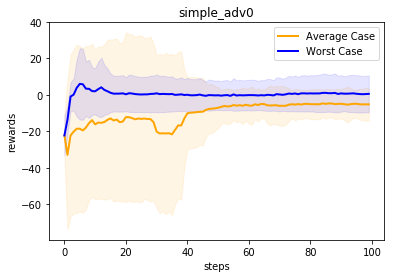

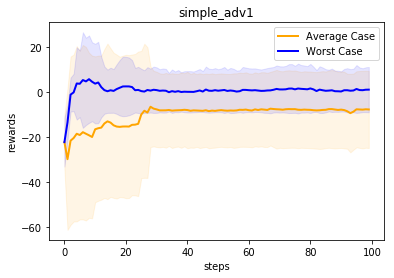

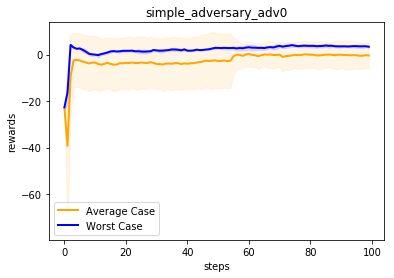

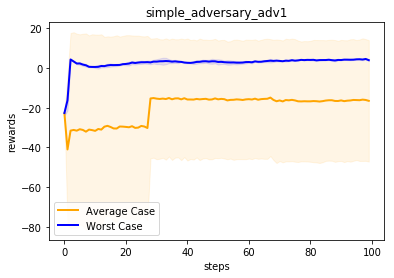

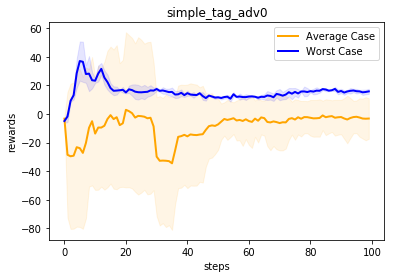

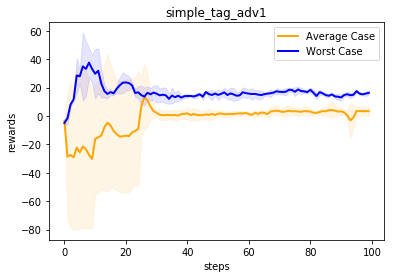

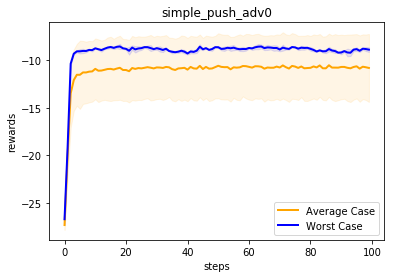

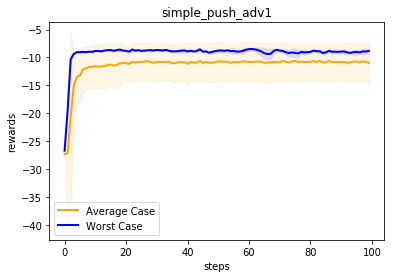

In [6]:
results = {}
envs = ['simple', 'simple_adversary', 'simple_tag', 'simple_push']
advs = ['adv0', 'adv1']

for env in envs:
    for adv in advs:
        for section in ['_rewards']:
            plt.figure()
            (a_mean, a_std), (w_mean, w_std) = get_rewards(env, adv, section)
            # (a_mean1, a_std1), (w_mean1, w_std1) = get_rewards(env, adv, section, 'new_')
            a_xs = range(len(a_mean))
            a_xs1 = range(len(a_mean1))
            w_xs = range(len(w_mean))

            plt.fill_between(a_xs, a_mean-a_std, a_mean+a_std, color='orange', alpha=0.1)
            plt.fill_between(w_xs, w_mean-w_std, w_mean+w_std, color='blue', alpha=0.1)
            # plt.fill_between(a_xs1, a_mean1-a_std1, a_mean1+a_std1, color='red', alpha=0.1)
        
            plt.plot(a_xs, a_mean, color='orange', lw=2, label="Average Case")
            # plt.plot(a_xs1, a_mean1, color='red', lw=2, label="Average Case 20 samples")
            plt.plot(w_xs, w_mean, color='blue', lw=2, label="Worst Case")
            plt.title(env+"_"+adv)
            plt.xlabel("steps")
            plt.ylabel(section[1:])
            plt.legend()
            plt.savefig(env+"_"+adv+".png")